1.Introduction To Problem :
 The problem is to predict the performance of the student in the final exam by using their activity

In [3]:
import pandas as pd

In [2]:
performance=pd.read_csv('Student_Performance.csv')

In [4]:
performance.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


2.Data Preprocessing

In [5]:
performance.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
performance.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [7]:
performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
performance=performance.drop(columns=['Extracurricular Activities'])

In [8]:
performance.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x=performance[['Hours Studied','Previous Scores','Sleep Hours','Sample Question Papers Practiced']]
y=performance['Performance Index']

In [11]:
x.head

<bound method NDFrame.head of       Hours Studied  Previous Scores  Sleep Hours  \
0                 7               99            9   
1                 4               82            4   
2                 8               51            7   
3                 5               52            5   
4                 7               75            8   
...             ...              ...          ...   
9995              1               49            4   
9996              7               64            8   
9997              6               83            8   
9998              9               97            7   
9999              7               74            8   

      Sample Question Papers Practiced  
0                                    1  
1                                    2  
2                                    2  
3                                    2  
4                                    5  
...                                ...  
9995                                 2  
9996 

In [12]:
y.head()

0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64

In [13]:
len(x)

10000

In [14]:
len(y)

10000

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)


In [16]:
x_train.shape

(7000, 4)

In [17]:
y_train.shape

(7000,)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
linear=LinearRegression()

In [20]:
linear.fit(x_train,y_train)

LinearRegression()

In [21]:
linear.intercept_

-33.53688143189799

In [22]:
linear.coef_

array([2.85920197, 1.01565817, 0.47654598, 0.18934393])

In [23]:
y_pred=linear.predict(x_test)

In [24]:
y_test

6252    51.0
4684    20.0
1731    46.0
4742    28.0
4521    41.0
        ... 
8014    32.0
1074    40.0
3063    33.0
6487    69.0
4705    29.0
Name: Performance Index, Length: 3000, dtype: float64

In [25]:
y_pred

array([55.03059814, 22.32273388, 47.63693161, ..., 33.12737237,
       67.62296094, 30.90828347])

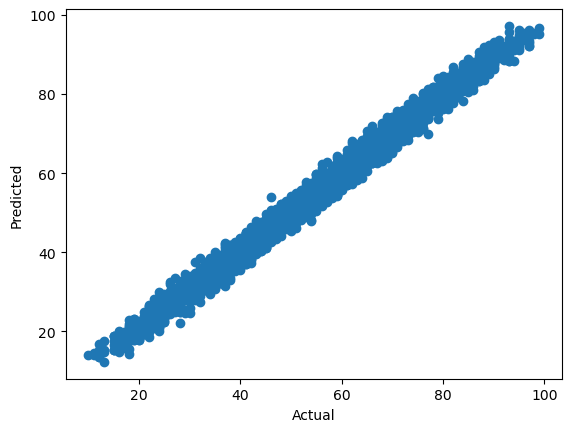

In [44]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [26]:
from sklearn.metrics import mean_absolute_error

In [27]:
print('Mean Absolute Error: ', mean_absolute_error(y_test,y_pred))

Mean Absolute Error:  1.6301766341063662


In [28]:
from sklearn.metrics import  mean_squared_error

In [29]:
print('Mean Squared Error: ', mean_squared_error(y_test,y_pred))

Mean Squared Error:  4.181379974575141


In [30]:
import math

In [31]:
print('Root Mean Squared Error is : ',math.sqrt(mean_squared_error(y_test,y_pred)))

Root Mean Squared Error is :  2.0448422859905704


In [32]:
residual=y_test-y_pred

In [33]:
residual

6252   -4.030598
4684   -2.322734
1731   -1.636932
4742   -3.035061
4521   -2.349663
          ...   
8014    0.488393
1074    2.217758
3063   -0.127372
6487    1.377039
4705   -1.908283
Name: Performance Index, Length: 3000, dtype: float64

In [44]:
sample=linear.predict([[7,99,7,1]])

c:\Users\praga\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [45]:
print(sample)

[90.55285738]
